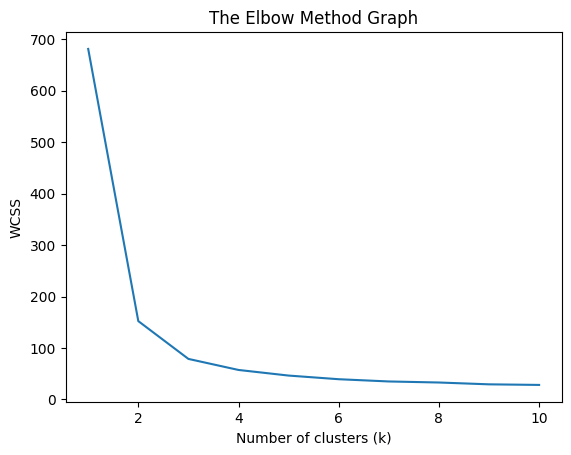

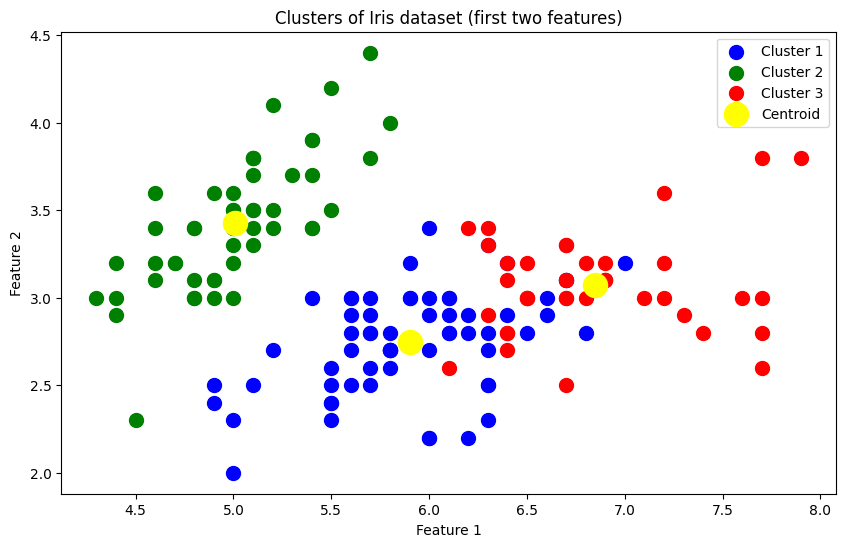

Silhouette Coefficient: 0.5528190123564095
Sum of Squared Errors (SSE): 78.85144142614601


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
x = iris.data
y_true = iris.target  # True labels are used for evaluation purposes

# Function to calculate the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to initialize centroids
def initialize_centroids(x, k):
    np.random.seed(42)
    random_indices = np.random.permutation(x.shape[0])
    centroids = x[random_indices[:k]]
    return centroids

# Function to create clusters
def create_clusters(x, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(x):
        closest_centroid = np.argmin([euclidean_distance(point, centroid) for centroid in centroids])
        clusters[closest_centroid].append(idx)
    return clusters

# Function to calculate new centroids
def calculate_new_centroids(clusters, x):
    centroids = np.zeros((len(clusters), x.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        new_centroid = np.mean(x[cluster], axis=0)
        centroids[cluster_idx] = new_centroid
    return centroids

# Function to predict clusters
def predict_clusters(clusters, x):
    y_predict = np.zeros(x.shape[0])
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_predict[sample_idx] = cluster_idx
    return y_predict

# K-means algorithm
def kmeans(x, k, max_iters=100):
    centroids = initialize_centroids(x, k)
    for _ in range(max_iters):
        clusters = create_clusters(x, centroids)
        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, x)
        if np.all(centroids == previous_centroids):
            break
    return centroids, clusters

# Function to evaluate clustering
def evaluate_clustering(x, y_predict, centroids, distance_func):
    silhouette_avg = silhouette_score(x, y_predict)
    sse = np.sum([distance_func(x[i], centroids[int(y_predict[i])]) ** 2 for i in range(len(x))])
    return silhouette_avg, sse

# Finding the optimal number of clusters using the elbow method
wcss_list = []
for i in range(1, 11):
    centroids, clusters = kmeans(x, i)
    wcss = 0
    for cluster_idx, cluster in enumerate(clusters):
        wcss += np.sum((x[cluster] - centroids[cluster_idx]) ** 2)
    wcss_list.append(wcss)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on the dataset
k = 3  # Iris dataset has 3 classes, so typically you would try k=3
centroids, clusters = kmeans(x, k)
y_predict = predict_clusters(clusters, x)

# Visualizing the clusters (2D projection for visualization purposes)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for cluster_idx, cluster in enumerate(clusters):
    plt.scatter(x[cluster, 0], x[cluster, 1], s=100, c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of Iris dataset (first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Evaluate the clustering
silhouette_avg, sse = evaluate_clustering(x, y_predict, centroids, euclidean_distance)
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Sum of Squared Errors (SSE): {sse}")

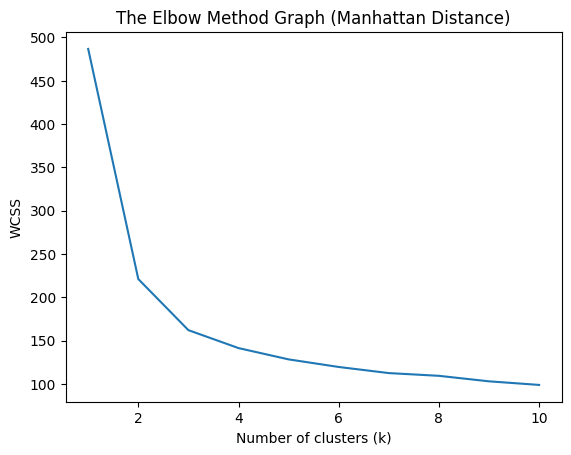

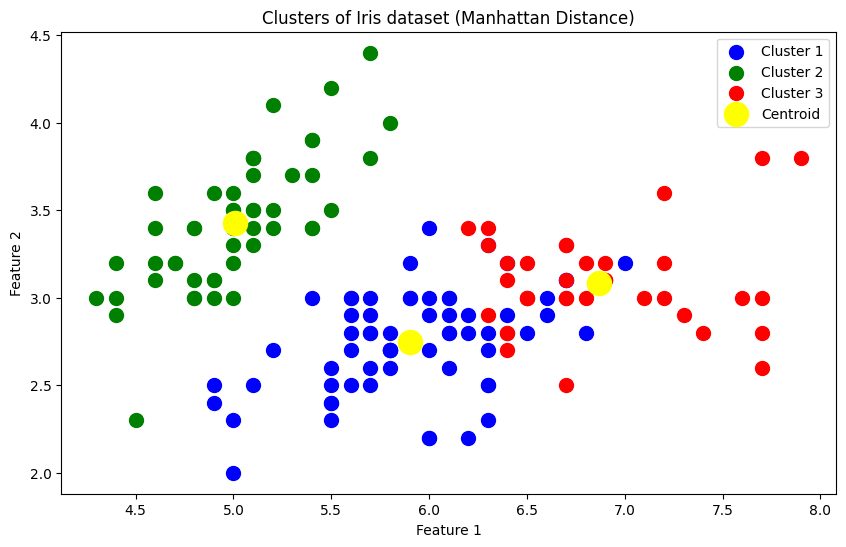

Silhouette Coefficient: 0.5533422301756081
Sum of Squared Errors (SSE): 162.17187816387815


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
x = iris.data
y_true = iris.target  # True labels, just for reference

# Function to calculate the Manhattan distance
def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

# Function to initialize centroids
def initialize_centroids(x, k):
    np.random.seed(42)
    random_indices = np.random.permutation(x.shape[0])
    centroids = x[random_indices[:k]]
    return centroids

# Function to evaluate clustering
def evaluate_clustering(x, y_predict, centroids, distance_func):
    silhouette_avg = silhouette_score(x, y_predict)
    sse = np.sum([distance_func(x[i], centroids[int(y_predict[i])]) for i in range(len(x))])
    return silhouette_avg, sse

# Function to create clusters
def create_clusters(x, centroids, distance_func):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(x):
        closest_centroid = np.argmin([distance_func(point, centroid) for centroid in centroids])
        clusters[closest_centroid].append(idx)
    return clusters

# Function to calculate new centroids
def calculate_new_centroids(clusters, x):
    centroids = np.zeros((len(clusters), x.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        new_centroid = np.mean(x[cluster], axis=0)
        centroids[cluster_idx] = new_centroid
    return centroids

# Function to predict clusters
def predict_clusters(clusters, x):
    y_predict = np.zeros(x.shape[0])
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_predict[sample_idx] = cluster_idx
    return y_predict

# K-means algorithm
def kmeans(x, k, distance_func, max_iters=100):
    centroids = initialize_centroids(x, k)
    for _ in range(max_iters):
        clusters = create_clusters(x, centroids, distance_func)
        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, x)
        if np.all(centroids == previous_centroids):
            break
    return centroids, clusters

# Finding the optimal number of clusters using the elbow method
wcss_list = []
for i in range(1, 11):
    centroids, clusters = kmeans(x, i, manhattan_distance)
    wcss = 0
    for cluster_idx, cluster in enumerate(clusters):
        wcss += np.sum([manhattan_distance(x[idx], centroids[cluster_idx]) for idx in cluster])
    wcss_list.append(wcss)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph (Manhattan Distance)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on the dataset
k = 3  # Iris has 3 classes
centroids, clusters = kmeans(x, k, manhattan_distance)
y_predict = predict_clusters(clusters, x)

# Visualizing the clusters (using the first two features for simplicity)
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for cluster_idx, cluster in enumerate(clusters):
    plt.scatter(x[cluster, 0], x[cluster, 1], s=100, c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of Iris dataset (Manhattan Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Evaluate the clustering
silhouette_avg, sse = evaluate_clustering(x, y_predict, centroids, manhattan_distance)
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Sum of Squared Errors (SSE): {sse}")


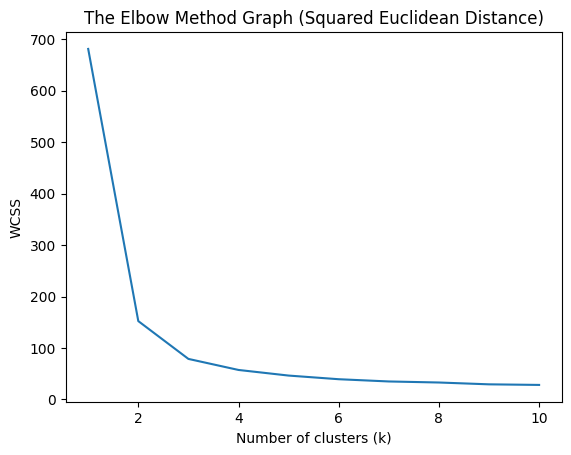

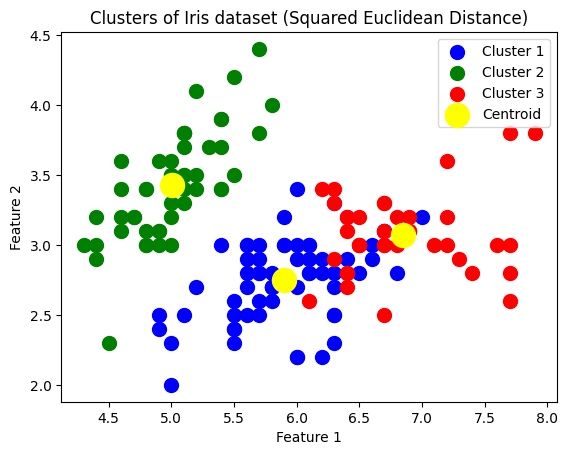

Silhouette Coefficient: 0.5528190123564095
Sum of Squared Errors (SSE): 78.85144142614601


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
x = iris.data
y_true = iris.target  # True labels for reference

# Function to calculate the Squared Euclidean distance
def squared_euclidean_distance(a, b):
    return np.sum((a - b) ** 2)

# Function to initialize centroids
def initialize_centroids(x, k):
    np.random.seed(42)
    random_indices = np.random.permutation(x.shape[0])
    centroids = x[random_indices[:k]]
    return centroids

# Function to create clusters
def create_clusters(x, centroids, distance_func):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(x):
        closest_centroid = np.argmin([distance_func(point, centroid) for centroid in centroids])
        clusters[closest_centroid].append(idx)
    return clusters

# Function to calculate new centroids
def calculate_new_centroids(clusters, x):
    centroids = np.zeros((len(clusters), x.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        new_centroid = np.mean(x[cluster], axis=0)
        centroids[cluster_idx] = new_centroid
    return centroids

# Function to predict clusters
def predict_clusters(clusters, x):
    y_predict = np.zeros(x.shape[0])
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_predict[sample_idx] = cluster_idx
    return y_predict

# K-means algorithm
def kmeans(x, k, distance_func, max_iters=100):
    centroids = initialize_centroids(x, k)
    for _ in range(max_iters):
        clusters = create_clusters(x, centroids, distance_func)
        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, x)
        if np.all(centroids == previous_centroids):
            break
    return centroids, clusters

# Finding the optimal number of clusters using the elbow method
wcss_list = []
for i in range(1, 11):
    centroids, clusters = kmeans(x, i, squared_euclidean_distance)
    wcss = 0
    for cluster_idx, cluster in enumerate(clusters):
        wcss += np.sum([squared_euclidean_distance(x[idx], centroids[cluster_idx]) for idx in cluster])
    wcss_list.append(wcss)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph (Squared Euclidean Distance)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on the dataset
k = 3  # Iris dataset has 3 natural clusters
centroids, clusters = kmeans(x, k, squared_euclidean_distance)
y_predict = predict_clusters(clusters, x)

# Visualizing the clusters (using the first two features for simplicity)
colors = ['blue', 'green', 'red']
for cluster_idx, cluster in enumerate(clusters):
    plt.scatter(x[cluster, 0], x[cluster, 1], s=100, c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of Iris dataset (Squared Euclidean Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Function to evaluate clustering
def evaluate_clustering(x, y_predict, centroids, distance_func):
    silhouette_avg = silhouette_score(x, y_predict)
    sse = np.sum([distance_func(x[i], centroids[int(y_predict[i])]) for i in range(len(x))])
    return silhouette_avg, sse

# Evaluate the clustering
silhouette_avg, sse = evaluate_clustering(x, y_predict, centroids, squared_euclidean_distance)
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Sum of Squared Errors (SSE): {sse}")


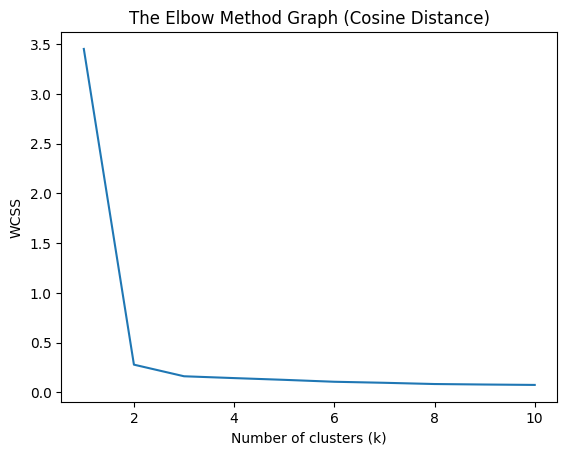

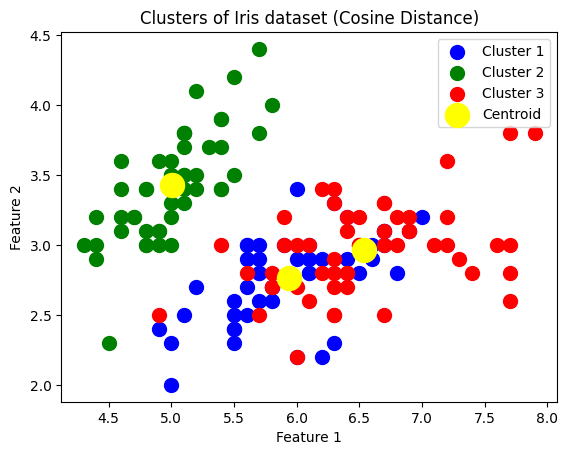

Silhouette Coefficient: 0.49420487803315233
Sum of Squared Errors (SSE): 0.161653681360163


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
x = iris.data
y_true = iris.target  # True labels for reference

# Function to calculate the Cosine distance
def cosine_distance(a, b):
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

# Function to initialize centroids
def initialize_centroids(x, k):
    np.random.seed(42)
    random_indices = np.random.permutation(x.shape[0])
    centroids = x[random_indices[:k]]
    return centroids

# Function to create clusters
def create_clusters(x, centroids, distance_func):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(x):
        closest_centroid = np.argmin([distance_func(point, centroid) for centroid in centroids])
        clusters[closest_centroid].append(idx)
    return clusters

# Function to calculate new centroids
def calculate_new_centroids(clusters, x):
    centroids = np.zeros((len(clusters), x.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        new_centroid = np.mean(x[cluster], axis=0)
        centroids[cluster_idx] = new_centroid
    return centroids

# Function to predict clusters
def predict_clusters(clusters, x):
    y_predict = np.zeros(x.shape[0])
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_predict[sample_idx] = cluster_idx
    return y_predict

# K-means algorithm
def kmeans(x, k, distance_func, max_iters=100):
    centroids = initialize_centroids(x, k)
    for _ in range(max_iters):
        clusters = create_clusters(x, centroids, distance_func)
        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, x)
        if np.all(centroids == previous_centroids):
            break
    return centroids, clusters

# Finding the optimal number of clusters using the elbow method
wcss_list = []
for i in range(1, 11):
    centroids, clusters = kmeans(x, i, cosine_distance)
    wcss = 0
    for cluster_idx, cluster in enumerate(clusters):
        wcss += np.sum([cosine_distance(x[idx], centroids[cluster_idx]) for idx in cluster])
    wcss_list.append(wcss)

plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph (Cosine Distance)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on the dataset
k = 3  # Iris dataset has 3 natural clusters
centroids, clusters = kmeans(x, k, cosine_distance)
y_predict = predict_clusters(clusters, x)

# Visualizing the clusters (using the first two features for simplicity)
colors = ['blue', 'green', 'red']
for cluster_idx, cluster in enumerate(clusters):
    plt.scatter(x[cluster, 0], x[cluster, 1], s=100, c=colors[cluster_idx], label=f'Cluster {cluster_idx + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of Iris dataset (Cosine Distance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Function to evaluate clustering
def evaluate_clustering(x, y_predict, centroids, distance_func):
    silhouette_avg = silhouette_score(x, y_predict)
    sse = np.sum([distance_func(x[i], centroids[int(y_predict[i])]) for i in range(len(x))])
    return silhouette_avg, sse

# Evaluate the clustering
silhouette_avg, sse = evaluate_clustering(x, y_predict, centroids, cosine_distance)
print(f"Silhouette Coefficient: {silhouette_avg}")
print(f"Sum of Squared Errors (SSE): {sse}")


Find the optimal k number of clusters using elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

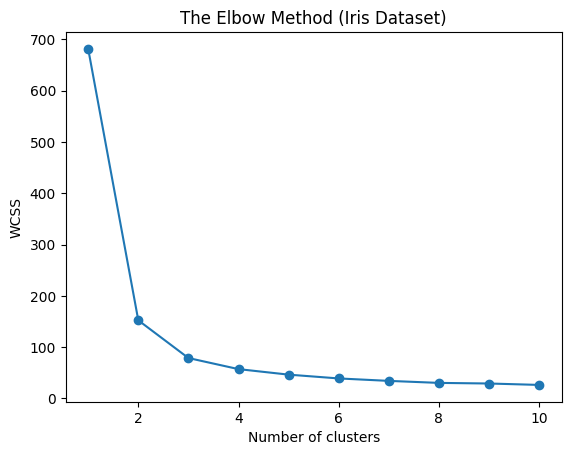

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
x = iris.data  # Use all four features (sepal length, sepal width, petal length, petal width)

# Finding the optimal number of clusters using the elbow method
wcss_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

# Plotting the results onto a line graph for the elbow method
plt.plot(range(1, 11), wcss_list, marker='o')
plt.title('The Elbow Method (Iris Dataset)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

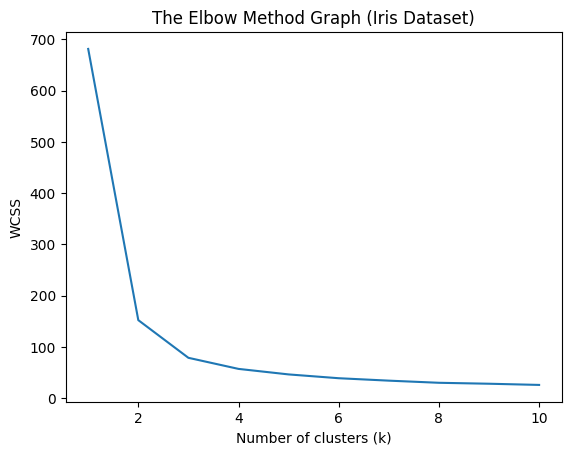

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


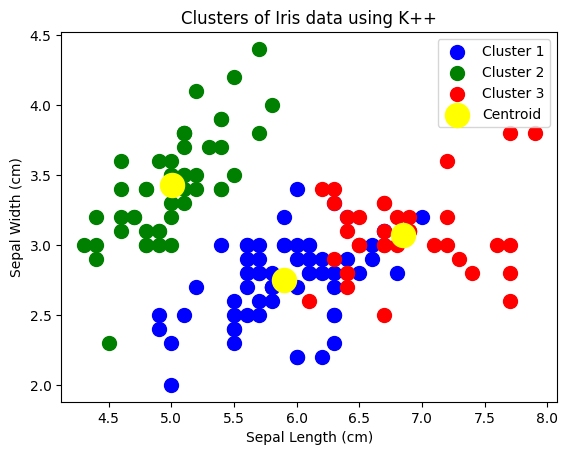

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
x = iris.data  # All four features (sepal length, sepal width, petal length, petal width)

# Finding the optimal number of clusters using the elbow method
wcss_list = []  # Initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph (Iris Dataset)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on the dataset with optimal clusters (say k = 3 for Iris)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x)

# Visualizing the clusters for the first two features (Sepal Length and Sepal Width)
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s=100, c='red', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')

# Titles and labels
plt.title('Clusters of Iris data using K++')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()


In [ ]:
pip install KModes

K mode

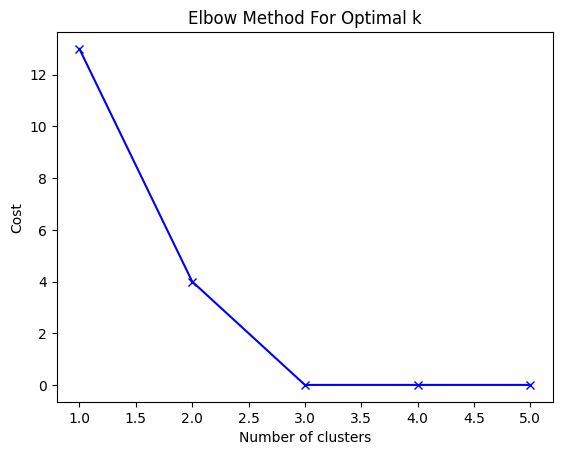

Last few centroid updates:
[['Blue' 'Circle' 'Small']
 ['Red' 'Square' 'Large']]
[['Blue' 'Circle' 'Small']
 ['Red' 'Square' 'Large']]
SSE (Sum of Squared Errors): 4.0
Silhouette Score: 0.75
   Color     Shape   Size  Cluster
0    Red    Square  Large        1
1   Blue    Circle  Small        0
2  Green  Triangle  Large        1
3   Blue    Circle  Small        0
4    Red    Square  Large        1
5  Green  Triangle  Large        1
6   Blue    Circle  Small        0
7    Red    Square  Large        1


In [ ]:
#kmode
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Create a sample categorical dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red'],
    'Shape': ['Square', 'Circle', 'Triangle', 'Circle', 'Square', 'Triangle', 'Circle', 'Square'],
    'Size': ['Large', 'Small', 'Large', 'Small', 'Large', 'Large', 'Small', 'Large']
}

df = pd.DataFrame(data)

# Encode categorical data for silhouette score calculation
df_encoded = df.apply(LabelEncoder().fit_transform)

# Step 2: Determine the optimal number of clusters using the elbow method
cost = []
K = range(1, 6)  # Testing cluster numbers from 1 to 5

for num_clusters in K:
    kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    kmodes.fit_predict(df)
    cost.append(kmodes.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., k=2 based on the elbow method)
optimal_k = 2

# Step 3: Apply K-Modes clustering with tracking centroid updates
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, verbose=1)
centroid_history = []

for iteration in range(10):  # Manually iterating to track centroid updates
    kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=1, verbose=0, max_iter=1)
    kmodes.fit(df)
    centroid_history.append(kmodes.cluster_centroids_)
    if iteration > 0 and np.all(kmodes.cluster_centroids_ == centroid_history[-2]):
        break  # Stop if centroids do not change

# Step 4: Print the last few centroid updates
print("Last few centroid updates:")
for centroids in centroid_history[-3:]:
    print(centroids)

# Step 5: Calculate SSE (Sum of Squared Errors)
sse = kmodes.cost_
print(f"SSE (Sum of Squared Errors): {sse}")

# Step 6: Calculate Silhouette Score
labels = kmodes.predict(df)
silhouette_avg = silhouette_score(df_encoded, labels, metric='hamming')
print(f"Silhouette Score: {silhouette_avg}")

# Step 7: Add the cluster labels to the dataset
df['Cluster'] = labels

# Step 8: Display the dataset with cluster labels
print(df)


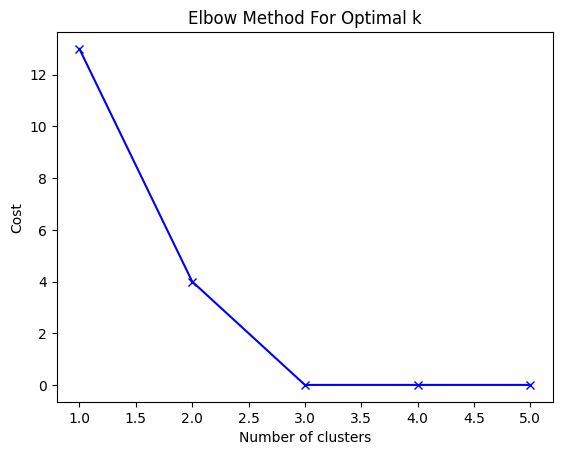

Last few centroid updates:
[['Red' 'Square' 'Large']
 ['Blue' 'Circle' 'Small']
 ['Green' 'Triangle' 'Large']]
[['Red' 'Square' 'Large']
 ['Blue' 'Circle' 'Small']
 ['Green' 'Triangle' 'Large']]
SSE (Sum of Squared Errors): 0.0
Silhouette Score: 1.0
   Color     Shape   Size  Cluster
0    Red    Square  Large        0
1   Blue    Circle  Small        1
2  Green  Triangle  Large        2
3   Blue    Circle  Small        1
4    Red    Square  Large        0
5  Green  Triangle  Large        2
6   Blue    Circle  Small        1
7    Red    Square  Large        0


In [ ]:
#kmode
import pandas as pd
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Create a sample categorical dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Blue', 'Red'],
    'Shape': ['Square', 'Circle', 'Triangle', 'Circle', 'Square', 'Triangle', 'Circle', 'Square'],
    'Size': ['Large', 'Small', 'Large', 'Small', 'Large', 'Large', 'Small', 'Large']
}

df = pd.DataFrame(data)

# Encode categorical data for silhouette score calculation
df_encoded = df.apply(LabelEncoder().fit_transform)

# Step 2: Determine the optimal number of clusters using the elbow method
cost = []
K = range(1, 6)  # Testing cluster numbers from 1 to 5

for num_clusters in K:
    kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=0)
    kmodes.fit_predict(df)
    cost.append(kmodes.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose the optimal number of clusters (e.g., k=2 based on the elbow method)
optimal_k = 3

# Step 3: Apply K-Modes clustering with tracking centroid updates
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, verbose=1)
centroid_history = []

for iteration in range(10):  # Manually iterating to track centroid updates
    kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=1, verbose=0, max_iter=1)
    kmodes.fit(df)
    centroid_history.append(kmodes.cluster_centroids_)
    if iteration > 0 and np.all(kmodes.cluster_centroids_ == centroid_history[-2]):
        break  # Stop if centroids do not change

# Step 4: Print the last few centroid updates
print("Last few centroid updates:")
for centroids in centroid_history[-3:]:
    print(centroids)

# Step 5: Calculate SSE (Sum of Squared Errors)
sse = kmodes.cost_
print(f"SSE (Sum of Squared Errors): {sse}")

# Step 6: Calculate Silhouette Score
labels = kmodes.predict(df)
silhouette_avg = silhouette_score(df_encoded, labels, metric='hamming')
print(f"Silhouette Score: {silhouette_avg}")

# Step 7: Add the cluster labels to the dataset
df['Cluster'] = labels

# Step 8: Display the dataset with cluster labels
print(df)

4)KNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import make_blobs

# Generate a synthetic dataset for classification
X_class, y_class = make_blobs(n_samples=500, centers=4, n_features=4, random_state=42)

# Generate a synthetic dataset for regression
np.random.seed(42)
X_reg = np.random.rand(500, 4)
y_reg = X_reg @ np.array([1.5, -2.0, 1.0, 0.5]) + np.random.randn(500) * 0.1

# Split the datasets into training and testing sets
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Standardize the features
scaler_class = StandardScaler()
X_class_train_scaled = scaler_class.fit_transform(X_class_train)
X_class_test_scaled = scaler_class.transform(X_class_test)

scaler_reg = StandardScaler()
X_reg_train_scaled = scaler_reg.fit_transform(X_reg_train)
X_reg_test_scaled = scaler_reg.transform(X_reg_test)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)
def evaluate_knn_classification(X_train, X_test, y_train, y_test, k, distance_func):
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_func)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    return train_accuracy, test_accuracy

# Example for k=4 using Euclidean distance
k = 4
train_accuracy, test_accuracy = evaluate_knn_classification(X_class_train_scaled, X_class_test_scaled, y_class_train, y_class_test, k, 'euclidean')
print(f"Train Accuracy (Euclidean, k={k}): {train_accuracy}")
print(f"Test Accuracy (Euclidean, k={k}): {test_accuracy}")
def find_optimal_k_classification(X_train, X_test, y_train, y_test, distance_func):
    test_accuracies = []
    for k in range(1, 21):
        _, test_accuracy = evaluate_knn_classification(X_train, X_test, y_train, y_test, k, distance_func)
        test_accuracies.append(test_accuracy)
    optimal_k = np.argmax(test_accuracies) + 1
    return optimal_k

# Find optimal k for Euclidean distance
optimal_k = find_optimal_k_classification(X_class_train_scaled, X_class_test_scaled, y_class_train, y_class_test, 'euclidean')
print(f"Optimal k (Euclidean): {optimal_k}")

# Rebuild the model with the optimal k
train_accuracy, test_accuracy = evaluate_knn_classification(X_class_train_scaled, X_class_test_scaled, y_class_train, y_class_test, optimal_k, 'euclidean')
print(f"Train Accuracy (Optimal k={optimal_k}): {train_accuracy}")
print(f"Test Accuracy (Optimal k={optimal_k}): {test_accuracy}")

def evaluate_knn_regression(X_train, X_test, y_train, y_test, k, distance_func):
    knn = KNeighborsRegressor(n_neighbors=k, metric=distance_func)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    return train_mse, test_mse

# Example for k=4 using Euclidean distance
k = 4
train_mse, test_mse = evaluate_knn_regression(X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, k, 'euclidean')
print(f"Train MSE (Euclidean, k={k}): {train_mse}")
print(f"Test MSE (Euclidean, k={k}): {test_mse}")

def find_optimal_k_regression(X_train, X_test, y_train, y_test, distance_func):
    test_mses = []
    for k in range(1, 21):
        _, test_mse = evaluate_knn_regression(X_train, X_test, y_train, y_test, k, distance_func)
        test_mses.append(test_mse)
    optimal_k = np.argmin(test_mses) + 1
    return optimal_k

# Find optimal k for Euclidean distance
optimal_k = find_optimal_k_regression(X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, 'euclidean')
print(f"Optimal k (Euclidean): {optimal_k}")

# Rebuild the model with the optimal k
train_mse, test_mse = evaluate_knn_regression(X_reg_train_scaled, X_reg_test_scaled, y_reg_train, y_reg_test, optimal_k, 'euclidean')
print(f"Train MSE (Optimal k={optimal_k}): {train_mse}")
print(f"Test MSE (Optimal k={optimal_k}): {test_mse}")

Train Accuracy (Euclidean, k=4): 1.0
Test Accuracy (Euclidean, k=4): 1.0
Optimal k (Euclidean): 1
Train Accuracy (Optimal k=1): 1.0
Test Accuracy (Optimal k=1): 1.0
Train MSE (Euclidean, k=4): 0.021701213394158952
Test MSE (Euclidean, k=4): 0.03627520999484653
Optimal k (Euclidean): 7
Train MSE (Optimal k=7): 0.025743729258440932
Test MSE (Optimal k=7): 0.03439741445068709


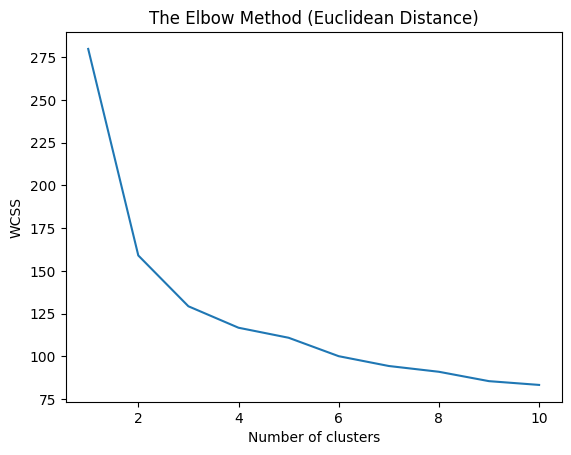

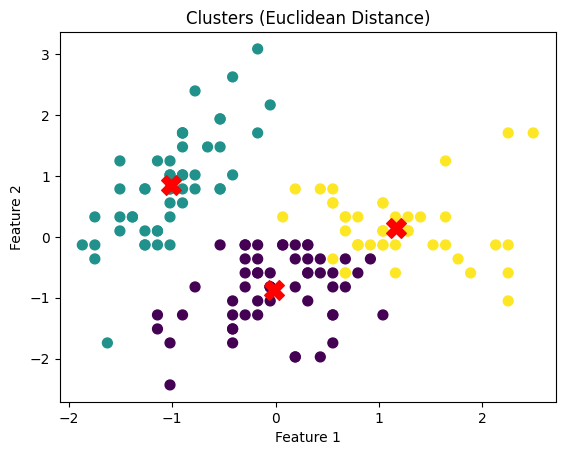

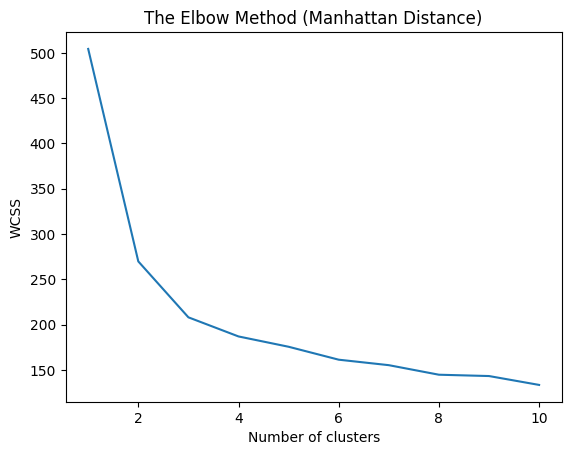

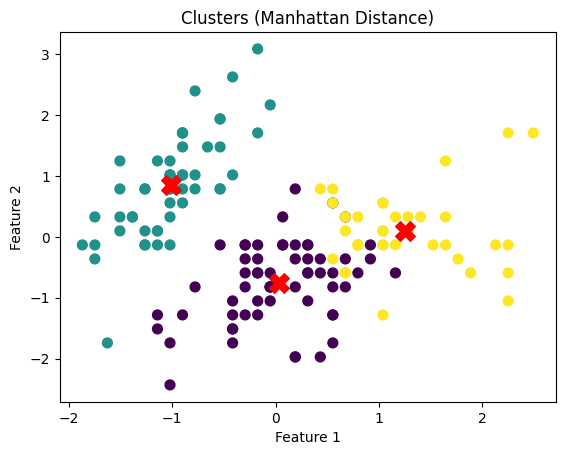

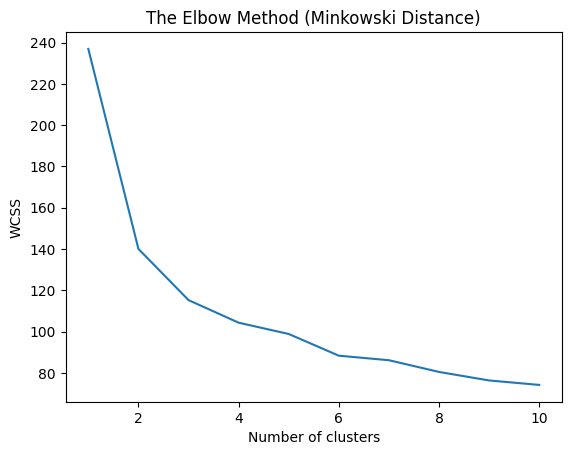

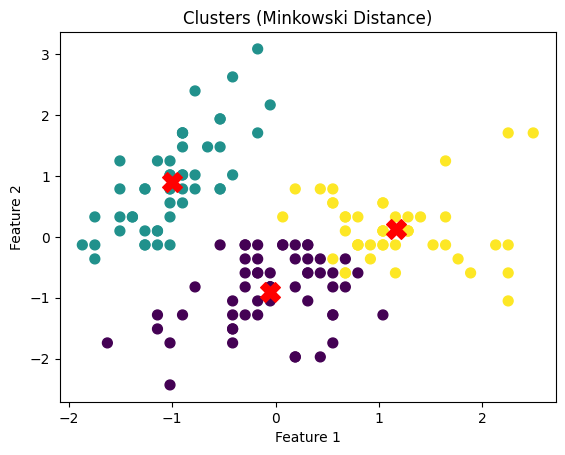

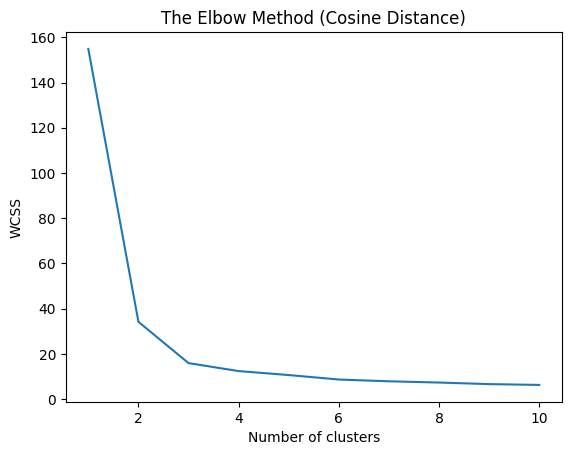

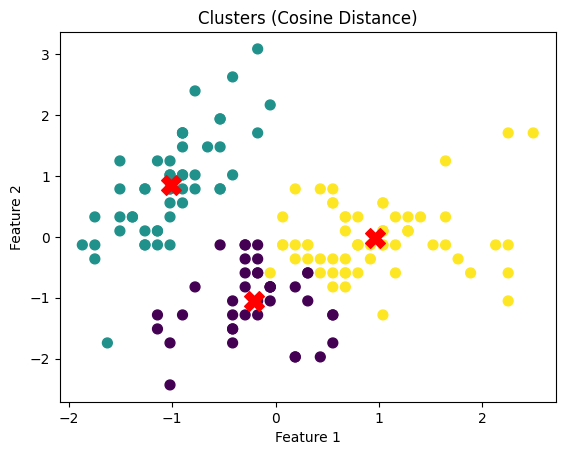

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Load the Iris dataset
iris = load_iris()
X = iris.data  # All four features (sepal length, sepal width, petal length, petal width)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define distance functions
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.power(np.sum(np.abs(a - b) ** p), 1/p)

def cosine_distance(a, b):
    return 1 - (np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)))

# Define K-means function
def kmeans(X, k, distance_func, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for idx, point in enumerate(X):
            distances = [distance_func(point, centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(idx)
        new_centroids = np.array([np.mean(X[cluster], axis=0) for cluster in clusters])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Define plotting functions
def plot_clusters(X, y_predict, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_elbow_method(X, distance_func, title):
    wcss_list = []
    for i in range(1, 11):
        centroids, clusters = kmeans(X, i, distance_func)
        wcss = 0
        for cluster_idx, cluster in enumerate(clusters):
            wcss += np.sum([distance_func(X[idx], centroids[cluster_idx]) for idx in cluster])
        wcss_list.append(wcss)
    plt.plot(range(1, 11), wcss_list)
    plt.title(f'The Elbow Method ({title})')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

# Example for Euclidean distance
plot_elbow_method(X_scaled, euclidean_distance, 'Euclidean Distance')
k = 3  # Based on the elbow method, choose 3 clusters
centroids, clusters = kmeans(X_scaled, k, euclidean_distance)
y_predict = np.zeros(X_scaled.shape[0])
for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
        y_predict[sample_idx] = cluster_idx
plot_clusters(X_scaled, y_predict, centroids, 'Clusters (Euclidean Distance)')

# Example for Manhattan distance
plot_elbow_method(X_scaled, manhattan_distance, 'Manhattan Distance')
centroids, clusters = kmeans(X_scaled, k, manhattan_distance)
y_predict = np.zeros(X_scaled.shape[0])
for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
        y_predict[sample_idx] = cluster_idx
plot_clusters(X_scaled, y_predict, centroids, 'Clusters (Manhattan Distance)')

# Example for Minkowski distance
plot_elbow_method(X_scaled, lambda a, b: minkowski_distance(a, b, p=3), 'Minkowski Distance')
centroids, clusters = kmeans(X_scaled, k, lambda a, b: minkowski_distance(a, b, p=3))
y_predict = np.zeros(X_scaled.shape[0])
for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
        y_predict[sample_idx] = cluster_idx
plot_clusters(X_scaled, y_predict, centroids, 'Clusters (Minkowski Distance)')

# Example for Cosine distance
plot_elbow_method(X_scaled, cosine_distance, 'Cosine Distance')
centroids, clusters = kmeans(X_scaled, k, cosine_distance)
y_predict = np.zeros(X_scaled.shape[0])
for cluster_idx, cluster in enumerate(clusters):
    for sample_idx in cluster:
        y_predict[sample_idx] = cluster_idx
plot_clusters(X_scaled, y_predict, centroids, 'Clusters (Cosine Distance)')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Create a DataFrame for convenience
df = pd.DataFrame(X, columns=california.feature_names)
df['PRICE'] = y

# Features and target variable
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate KNN regression
def evaluate_knn_regression(X_train, X_test, y_train, y_test, metric, p=None):
    mse_list = []
    for k in range(1, 21):
        knn = KNeighborsRegressor(n_neighbors=k, metric=metric, p=p)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mse_list.append(mse)

        if k % 5 == 0:  # Print updates every 5 iterations
            print(f"Update for K={k} with {metric} distance:")
            print(f"Predictions: {y_pred[:5]}")  # Print first 5 predictions for brevity
            print(f"Mean Squared Error: {mse}")

    optimal_k = np.argmin(mse_list) + 1
    print(f"Optimal K for {metric} distance: {optimal_k}")

    return optimal_k, mse_list

# Evaluate KNN regression for each metric
metrics = [('euclidean', None), ('manhattan', None), ('minkowski', 3)]
for metric, p in metrics:
    print(f"\nEvaluating KNN Regression with {metric} distance:")
    optimal_k_reg, mse_list = evaluate_knn_regression(X_train, X_test, y_train, y_test, metric, p)

    # Rebuild and evaluate with optimal K
    knn_optimal_reg = KNeighborsRegressor(n_neighbors=optimal_k_reg, metric=metric, p=p)
    knn_optimal_reg.fit(X_train, y_train)
    y_pred_optimal = knn_optimal_reg.predict(X_test)

    # Final evaluation
    final_mse = mean_squared_error(y_test, y_pred_optimal)
    print(f"Final MSE with optimal K={optimal_k_reg} for {metric} distance: {final_mse}")



Evaluating KNN Regression with euclidean distance:
Update for K=5 with euclidean distance:
Predictions: [0.4988   0.7646   4.750006 2.8078   2.7262  ]
Mean Squared Error: 0.42949402014873317
Update for K=10 with euclidean distance:
Predictions: [0.5412   0.6913   4.311704 2.5743   2.5864  ]
Mean Squared Error: 0.4124581827685599
Update for K=15 with euclidean distance:
Predictions: [0.55626667 0.83646667 4.20520333 2.5812     2.65586667]
Mean Squared Error: 0.4119391099289706
Update for K=20 with euclidean distance:
Predictions: [0.55455  0.841    4.015603 2.67875  2.5464  ]
Mean Squared Error: 0.417803663801807
Optimal K for euclidean distance: 13
Final MSE with optimal K=13 for euclidean distance: 0.4106207093262399

Evaluating KNN Regression with manhattan distance:
Update for K=5 with manhattan distance:
Predictions: [0.4952   0.7646   4.433404 2.7952   2.6146  ]
Mean Squared Error: 0.3812783694929903
Update for K=10 with manhattan distance:
Predictions: [0.529    0.9287   4.31170

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def create_clusters(X, centroids, distance_func):
    clusters = [[] for _ in range(len(centroids))]
    for idx, point in enumerate(X):
        closest_centroid = np.argmin([distance_func(point, centroid) for centroid in centroids])
        clusters[closest_centroid].append(idx)
    return clusters

def calculate_new_centroids(clusters, X):
    centroids = np.zeros((len(clusters), X.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        new_centroid = np.mean(X[cluster], axis=0)
        centroids[cluster_idx] = new_centroid
    return centroids

def predict_clusters(clusters, X):
    y_predict = np.zeros(X.shape[0])
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_predict[sample_idx] = cluster_idx
    return y_predict

def kmeans(X, k, distance_func, max_iters=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        clusters = create_clusters(X, centroids, distance_func)
        previous_centroids = centroids
        centroids = calculate_new_centroids(clusters, X)
        if np.all(centroids == previous_centroids):
            break
    return centroids, clusters
def evaluate_clustering(X_train, X_test, y_train, y_test, centroids, clusters, distance_func):
    y_train_predict = predict_clusters(clusters, X_train)
    train_accuracy = accuracy_score(y_train, y_train_predict)

    clusters_test = create_clusters(X_test, centroids, distance_func)
    y_test_predict = predict_clusters(clusters_test, X_test)
    test_accuracy = accuracy_score(y_test, y_test_predict)

    return train_accuracy, test_accuracy

# Example for Euclidean distance
k = 4
centroids, clusters = kmeans(X_train_scaled, k, euclidean_distance)
train_accuracy, test_accuracy = evaluate_clustering(X_train_scaled, X_test_scaled, y_train, y_test, centroids, clusters, euclidean_distance)
print(f"Train Accuracy (Euclidean): {train_accuracy}")
print(f"Test Accuracy (Euclidean): {test_accuracy}")
test_accuracies = []
for k in range(1, 11):
    centroids, clusters = kmeans(X_train_scaled, k, euclidean_distance)
    _, test_accuracy = evaluate_clustering(X_train_scaled, X_test_scaled, y_train, y_test, centroids, clusters, euclidean_distance)
    test_accuracies.append(test_accuracy)

optimal_k = np.argmax(test_accuracies) + 1
print(f"Optimal k: {optimal_k}")

# Plotting function
def plot_clusters(X, y_predict, centroids, title):
    plt.scatter(X[:, 0], X[:, 1], c=y_predict, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


Train Accuracy (Euclidean): 0.26666666666666666
Test Accuracy (Euclidean): 0.23333333333333334
Optimal k: 1
